# Trabalho Final da Matéria de Processamento de Imagens - BCC FURB

<b>Turma:</b> SUP-CMP.187.0.2-2024/1<br>
<b>Docente:</b> Aurélio Faustino Hoppe<br>
<b>Discentes:</b> Arthur B Pinotti, Kaue Reblin, Luiz G Klitzke<br>

## Treinando o modelo com o Dataset

In [60]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

In [14]:
# Parâmetros gerais

img_height, img_width = 256, 256
path_dataset = "Dataset"
labels_classes = ["Habitado", "NaoHabitado"]

In [15]:
#Obtem os datasets de treino e validação através da estrutura de pastas baixada do dataset, usando seus nomes para separar as labels

train_dataset, validation_dataset  = keras.utils.image_dataset_from_directory(
    path_dataset,
    labels = "inferred",
    label_mode = "int",
    class_names = labels_classes,
    color_mode = "rgb",
    batch_size = 32,
    image_size = (img_height, img_width), #Tentativas de diminuir a escala resultam em resultados piores, devido à perda de detalhes já esparsos
    shuffle = True,
    validation_split = 0.3, #Usa n% de dados para validação
    subset = "both",
    verbose =  True,
    seed = 1024,
)

Found 486 files belonging to 2 classes.
Using 341 files for training.
Using 145 files for validation.


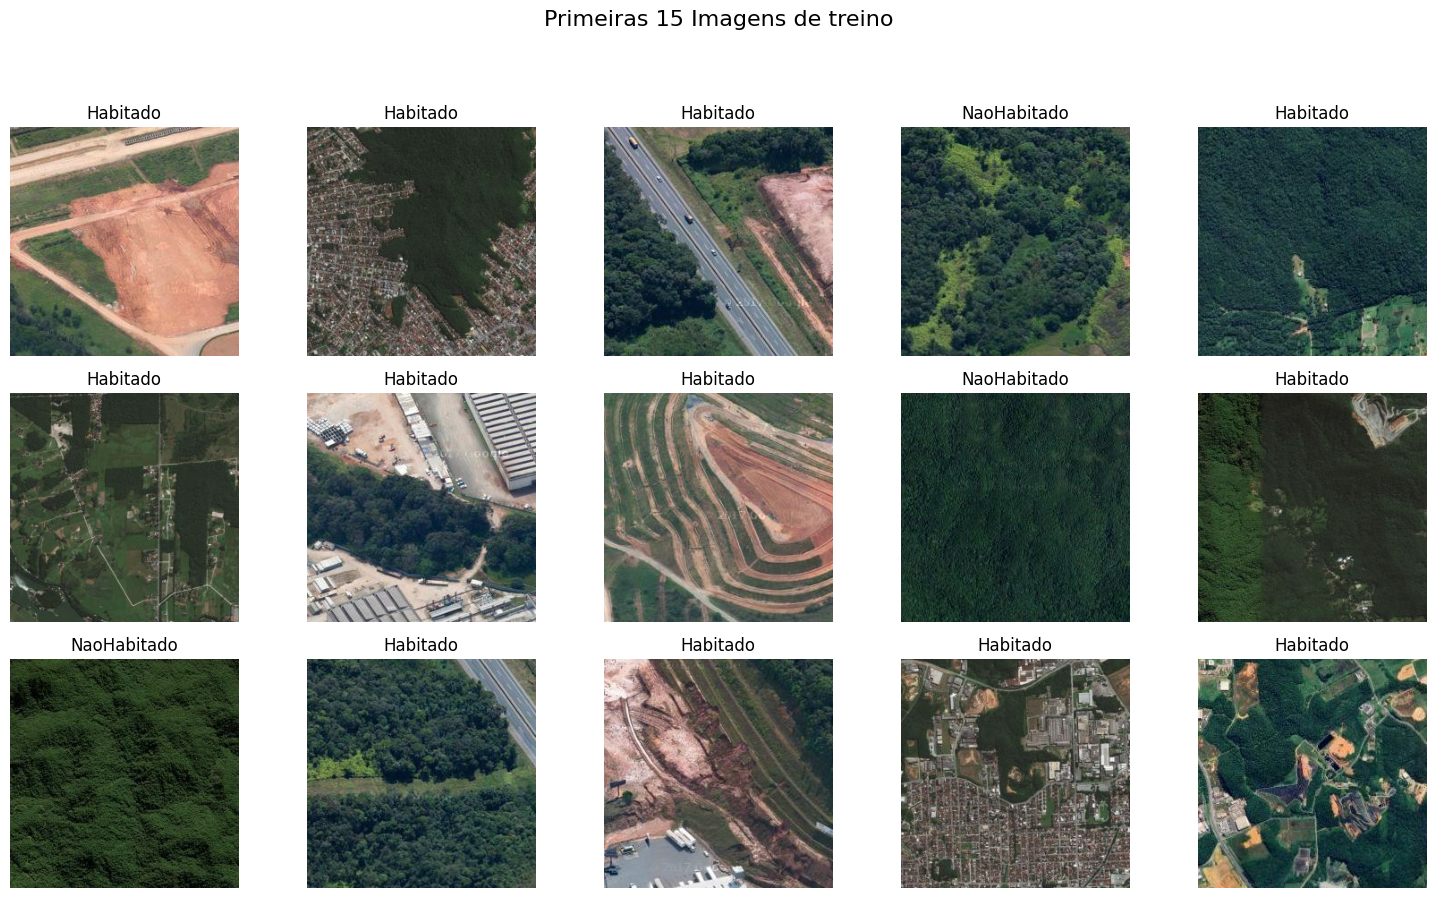

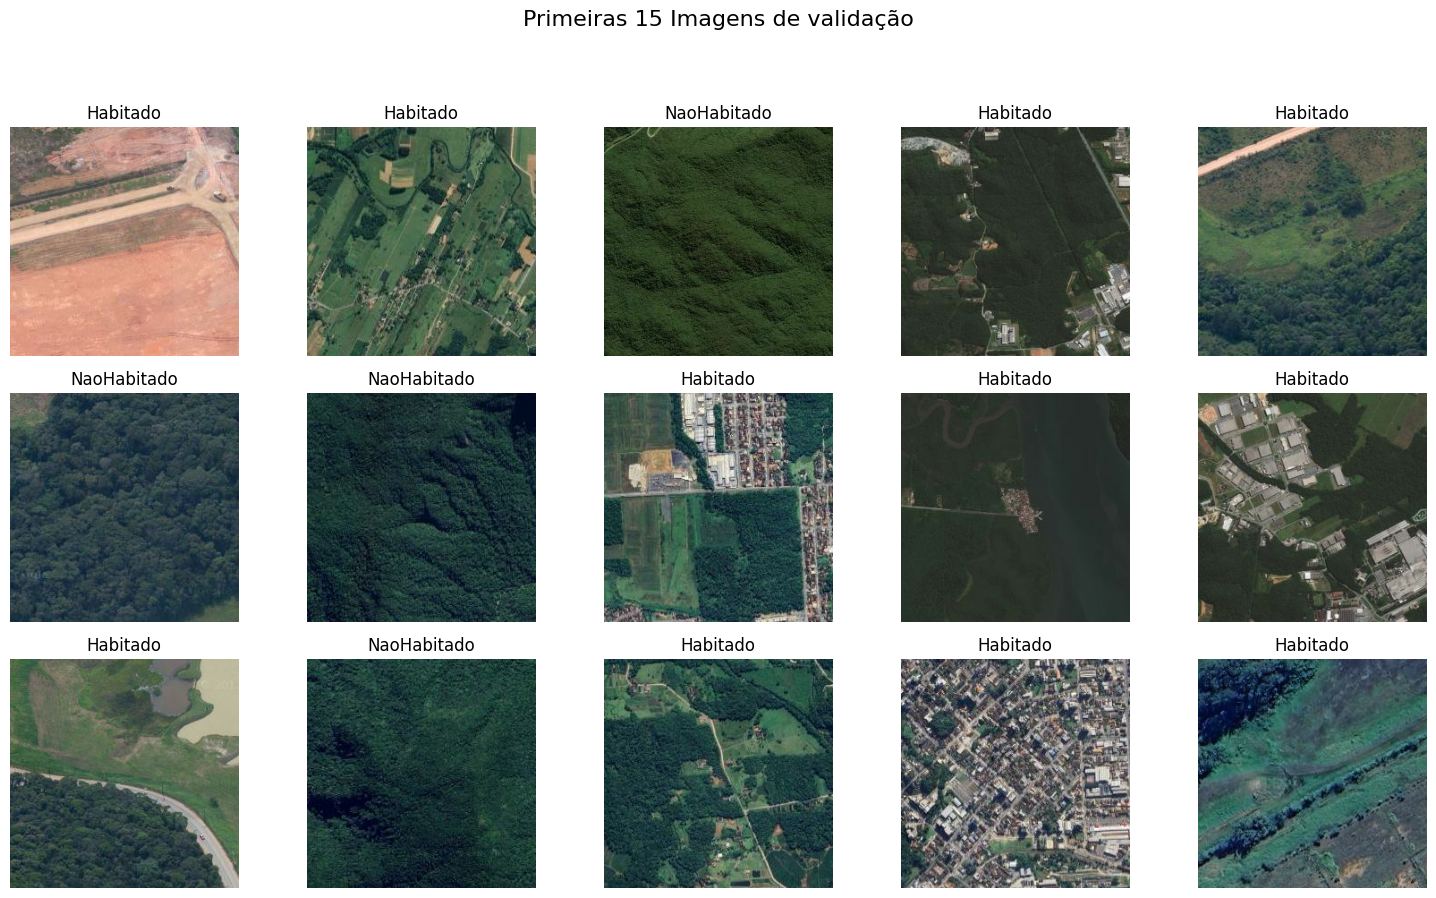

In [46]:
show_first_n = 15

plt.figure(figsize=(15, 15))
plt.suptitle(f"Primeiras {show_first_n} Imagens de treino", fontsize = 16)
for images, labels in train_dataset.take(2):
    for i in range(show_first_n):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(labels_classes[labels[i]])
        plt.axis("off")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajustar layout para não sobrepor o título
plt.show()

plt.figure(figsize=(15, 15))
plt.suptitle(f"Primeiras {show_first_n} Imagens de validação", fontsize = 16)
for images, labels in validation_dataset.take(2):
    for i in range(show_first_n):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(labels_classes[labels[i]])
        plt.axis("off")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [19]:
data_augmentation = keras.Sequential(
    [
        keras.layers.RandomFlip("horizontal_and_vertical"),
        keras.layers.RandomRotation(0.2),
        keras.layers.RandomZoom(0.2),
        keras.layers.RandomBrightness(0.2),
        keras.layers.RandomContrast(0.2),
    ]
)

# Modelo
cnn = keras.models.Sequential([
    keras.layers.InputLayer(input_shape = (img_height, img_width, 3)),

    #Processo para evitar overfitting caso a rede decore os resultados
    data_augmentation,

    keras.layers.Conv2D(32, (3, 3), activation = "relu", padding = "same"),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(64, (3, 3), activation = "relu", padding = "same"),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(128, (3, 3), activation = "relu", padding = "same"),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(256, (3, 3), activation = "relu", padding = "same"),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),

    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(1, activation="sigmoid")
])

cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │    16,777,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,198,913 (65.61 MB)

 Trainable params: 17,198,913 (65.61 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
cnn.compile(
    loss="binary_crossentropy", 
    optimizer = keras.optimizers.Adam(learning_rate=0.001), 
    metrics=["accuracy"]
)

# Early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor ="val_loss",
    patience = 5,
    restore_best_weights = True
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor = "val_loss",
    factor = 0.2,
    patience = 3,
    min_lr = 0.00001
)

# Treinamento do modelo
history_cnn = cnn.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.5849 - loss: 4.9963 - val_accuracy: 0.6069 - val_loss: 0.6571 - learning_rate: 0.0010
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.7219 - loss: 0.5716 - val_accuracy: 0.8000 - val_loss: 0.3940 - learning_rate: 0.0010
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.7095 - loss: 0.5700 - val_accuracy: 0.7034 - val_loss: 0.4518 - learning_rate: 0.0010
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.7239 - loss: 0.5201 - val_accuracy: 0.6897 - val_loss: 0.5235 - learning_rate: 0.0010
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.7874 - loss: 0.4898 - val_accuracy: 0.8621 - val_loss: 0.4905 - learning_rate: 0.0010
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8232 - loss: 0.4419 - val_accuracy: 0.8276 - val_loss: 0.3739 - learning_rate: 2.0000e-04
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.8472 - loss: 0.3484 - val_accura

In [23]:
# Avaliação do cnno
loss, accuracy = cnn.evaluate(validation_dataset, verbose = 1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - accuracy: 0.9128 - loss: 0.1963


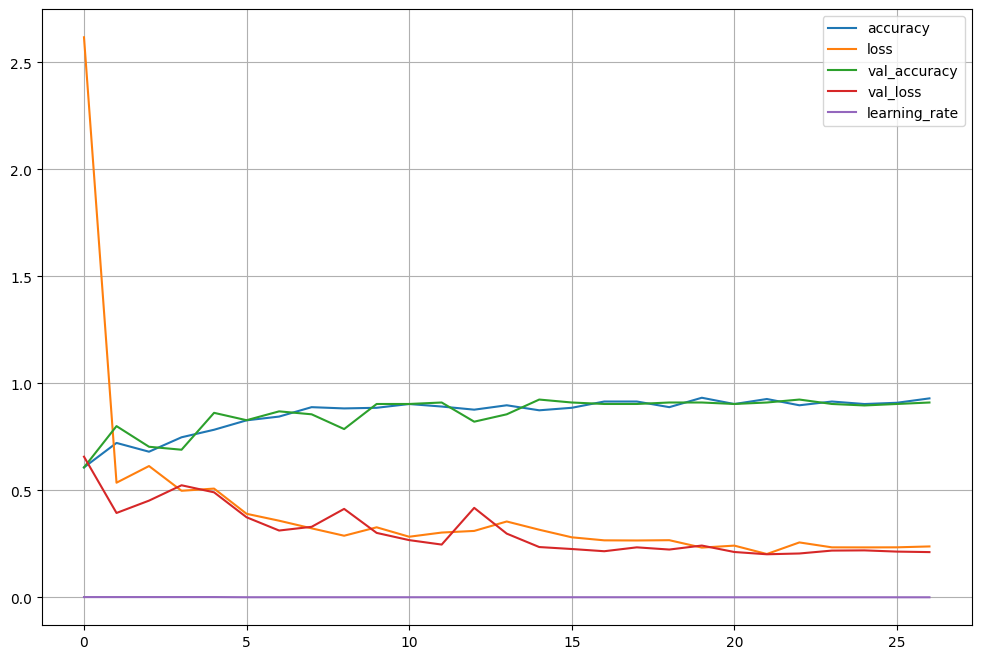

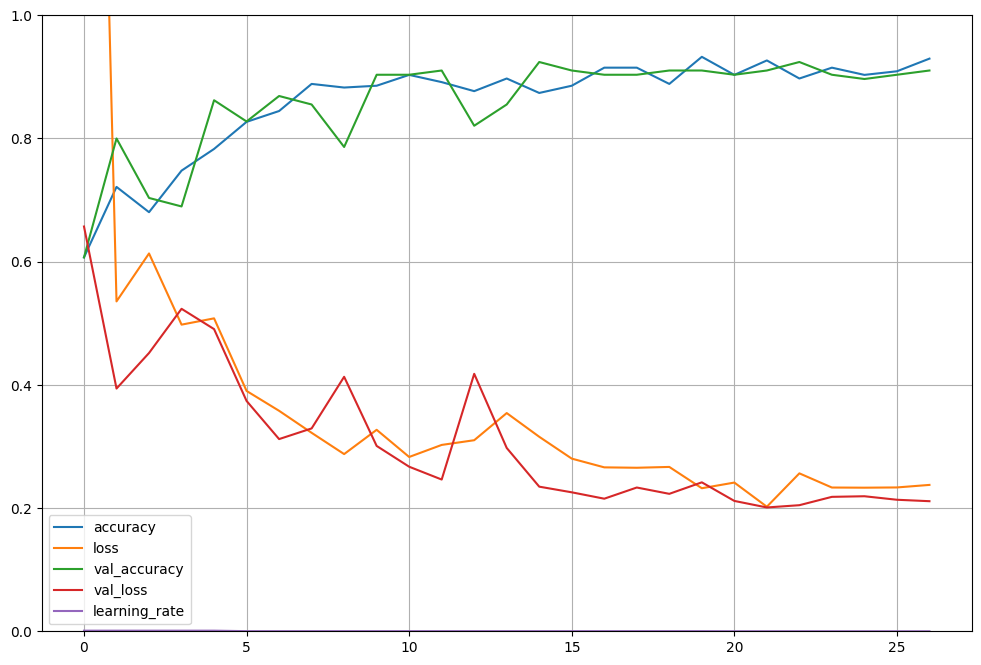

In [24]:
#Apresenta os dados da performânce do algoritmo, atráves do membro history, preenchido com a execução.
pd.DataFrame(history_cnn.history).plot(figsize=(12, 8))
plt.grid(True)
plt.show()

#Apresenta os dados da performânce do algoritmo, atráves do membro history, preenchido com a execução.

pd.DataFrame(history_cnn.history).plot(figsize=(12, 8))
plt.gca().set_ylim(0, 1) #Limitando o range vertical para máximo de 1
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


<Figure size 800x800 with 0 Axes>

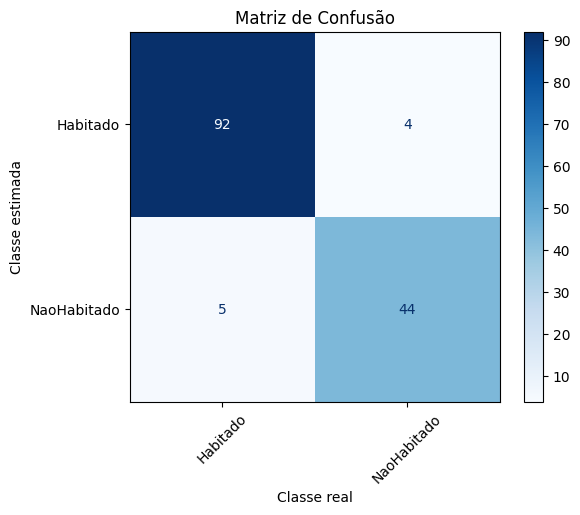

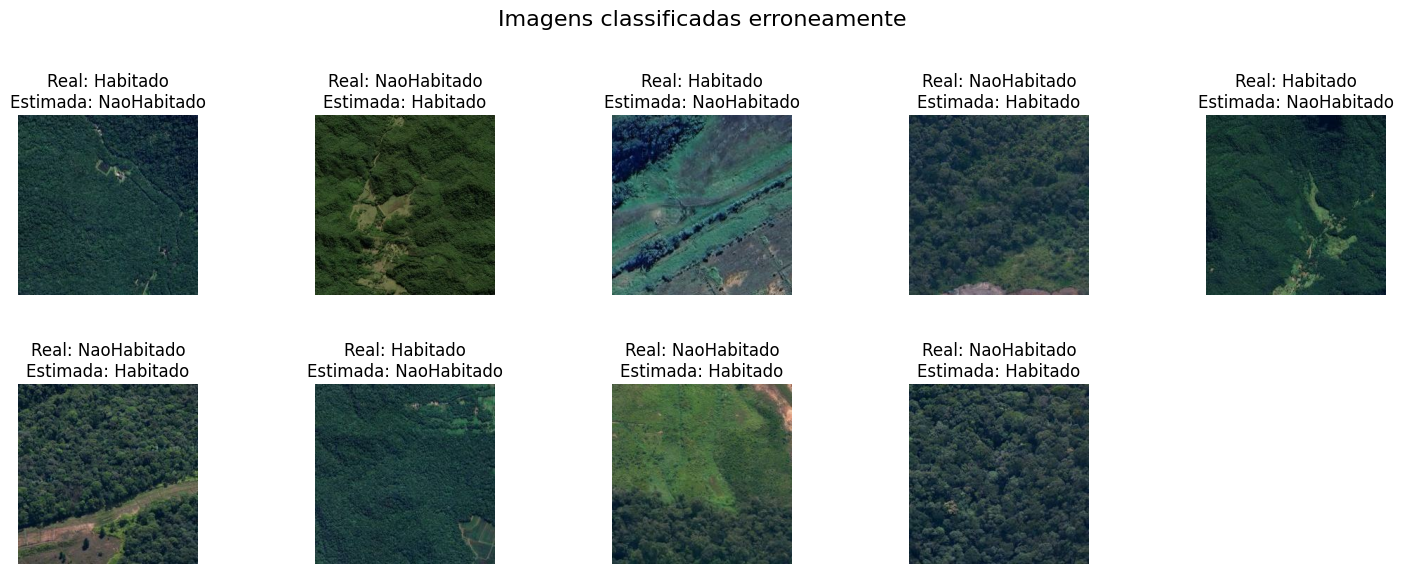

In [73]:
# Arrays para armazenar previsões e labels verdadeiras
validation_predictions = []
true_labels = []

# Arrays para armazenar imagens e labels que não coincidem
misclassified_images = []
misclassified_true_labels = []
misclassified_predicted_labels = []

# Iterar sobre o conjunto de validação e fazer previsões
for images, labels in validation_dataset:
    predictions = cnn.predict(images)
    predictions = (predictions > 0.5).astype("int32").flatten()
    validation_predictions.extend(predictions)
    true_labels.extend(labels.numpy())

    for i in range(len(predictions)):
        if predictions[i] != labels.numpy()[i]:
            misclassified_images.append(images[i])
            misclassified_true_labels.append(labels.numpy()[i])
            misclassified_predicted_labels.append(predictions[i])

validation_predictions = np.array(validation_predictions).flatten()
true_labels = np.array(true_labels).flatten()

# Construir a matriz de confusão
cm = confusion_matrix(true_labels, validation_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels_classes)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.xlabel("Classe real")
plt.ylabel("Classe estimada")
plt.xticks(rotation =  45)

 # Plotar as imagens classificadas erroneamente
if (len(misclassified_images) != 0):
    num_images_per_row = 5
    num_images = len(misclassified_images)
    num_rows = (num_images + num_images_per_row - 1) // num_images_per_row

    plt.figure(figsize = (15, num_rows * 3))
    plt.suptitle("Imagens classificadas erroneamente", fontsize = 16)

    for i in range(num_images):
        ax = plt.subplot(num_rows, num_images_per_row, i + 1)
        plt.imshow(misclassified_images[i].numpy().astype("uint8"))
        true_label = labels_classes[int(misclassified_true_labels[i])]
        predicted_label = labels_classes[int(misclassified_predicted_labels[i])]
        plt.title(f"Real: {true_label}\nEstimada: {predicted_label}")
        plt.axis("off")

    plt.tight_layout(h_pad = 4, rect = [0, 0.03, 1, 0.95])	
    plt.show()


### Salvar rede já treinada, para uso posterior

In [20]:
cnn.save("resultados/redes/treinamento.keras")

### Caregar rede já treinada - sobrescrever o treinamento realizado agora

In [26]:
cnn = keras.models.load_model("resultados/redes/treinamento.keras")